In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [32]:
Califorhosedt = pd.read_csv('housing.csv')
print(Califorhosedt.head().to_string())
print("\n")
print(Califorhosedt.info())
print("\n")
print(Califorhosedt.shape)
print("\n")
print("Data Shape:", Califorhosedt.shape)
print("\nData Types:\n", Califorhosedt.dtypes)
print("\nMissing Values:\n", Califorhosedt.isnull().sum())
print("\nSummary Statistics Of Data:\n", Califorhosedt.describe(include='all'))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Co

In [33]:
DuplicateRowsum = Califorhosedt.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", Califorhosedt[Califorhosedt.duplicated()])
print("\n")
database_withDuplicatedRowsGone = Califorhosedt.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


The Database Without the Duplicaed Rows Here 
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            3

In [34]:
Partial_Duplicates_Rows_Count = Califorhosedt.duplicated(keep=False).sum()
print("The No of Partial Duplicates Rows are: ", Partial_Duplicates_Rows_Count)
print("\n")
Califorhosedt_no_partial_duplicates = Califorhosedt.drop_duplicates(keep='first')
print(Califorhosedt_no_partial_duplicates.head().to_string())

The No of Partial Duplicates Rows are:  0


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY


In [35]:
print("Missing Values in each Column: \n", Califorhosedt.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (Califorhosedt.isnull().mean()*100))

Missing_Values_Coloums_Dataframe = pd.DataFrame({
    'Missing_Values_Coloums': Califorhosedt.isnull().any(),
    'Missing_Values_Count': Califorhosedt.isnull().sum(),
    'Missing_ValuesIn_Percentage': (Califorhosedt.isnull().sum() / len(Califorhosedt)) * 100
})

print(Missing_Values_Coloums_Dataframe.to_string())

Missing Values in each Column: 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Percentage of Missing Values in each Column: 
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64
                    Missing_Values_Coloums  Missing_Values_Count  Missing_ValuesIn_Percentage
longitude                            False                     0                     0.000000
latitude                             False                     0                     0.000000
housing_median_age                   F

In [36]:
def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column] = database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column] = database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database

Database_After_Imputation = Imputation_Of_Values(Califorhosedt)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())

Filled NaN in numeric column 'longitude' with Median = -118.49
Filled NaN in numeric column 'latitude' with Median = 34.26
Filled NaN in numeric column 'housing_median_age' with Median = 29.0
Filled NaN in numeric column 'total_rooms' with Median = 2127.0
Filled NaN in numeric column 'total_bedrooms' with Median = 435.0
Filled NaN in numeric column 'population' with Median = 1166.0
Filled NaN in numeric column 'households' with Median = 409.0
Filled NaN in numeric column 'median_income' with Median = 3.5347999999999997
Filled NaN in numeric column 'median_house_value' with Median = 179700.0
Filled NaN in categorical column 'ocean_proximity' with Mode = <1H OCEAN
The Database After Imputation of Missing Values is : 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            45260



 Statistical Explanation Defined Here : 


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.

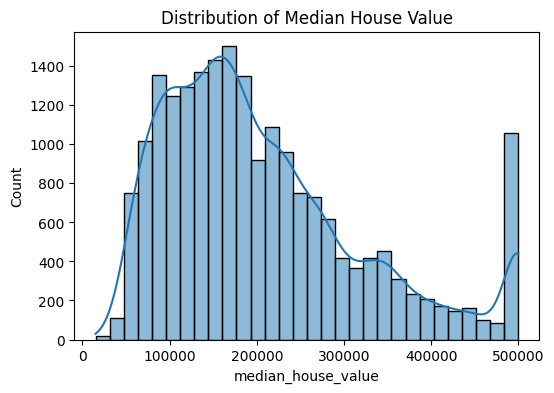

In [37]:
# Descriptive statistics
print("\n\n Statistical Explanation Defined Here : \n\n")
print(Database_After_Imputation.describe())

print("\n\n I am Showing the Distribution of the Target Variable Here ! \n\n")
plt.figure(figsize=(6,4))
sns.histplot(Database_After_Imputation['median_house_value'], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.show()




 Outlier Detection Using Boxplots for Key Numerical Features 




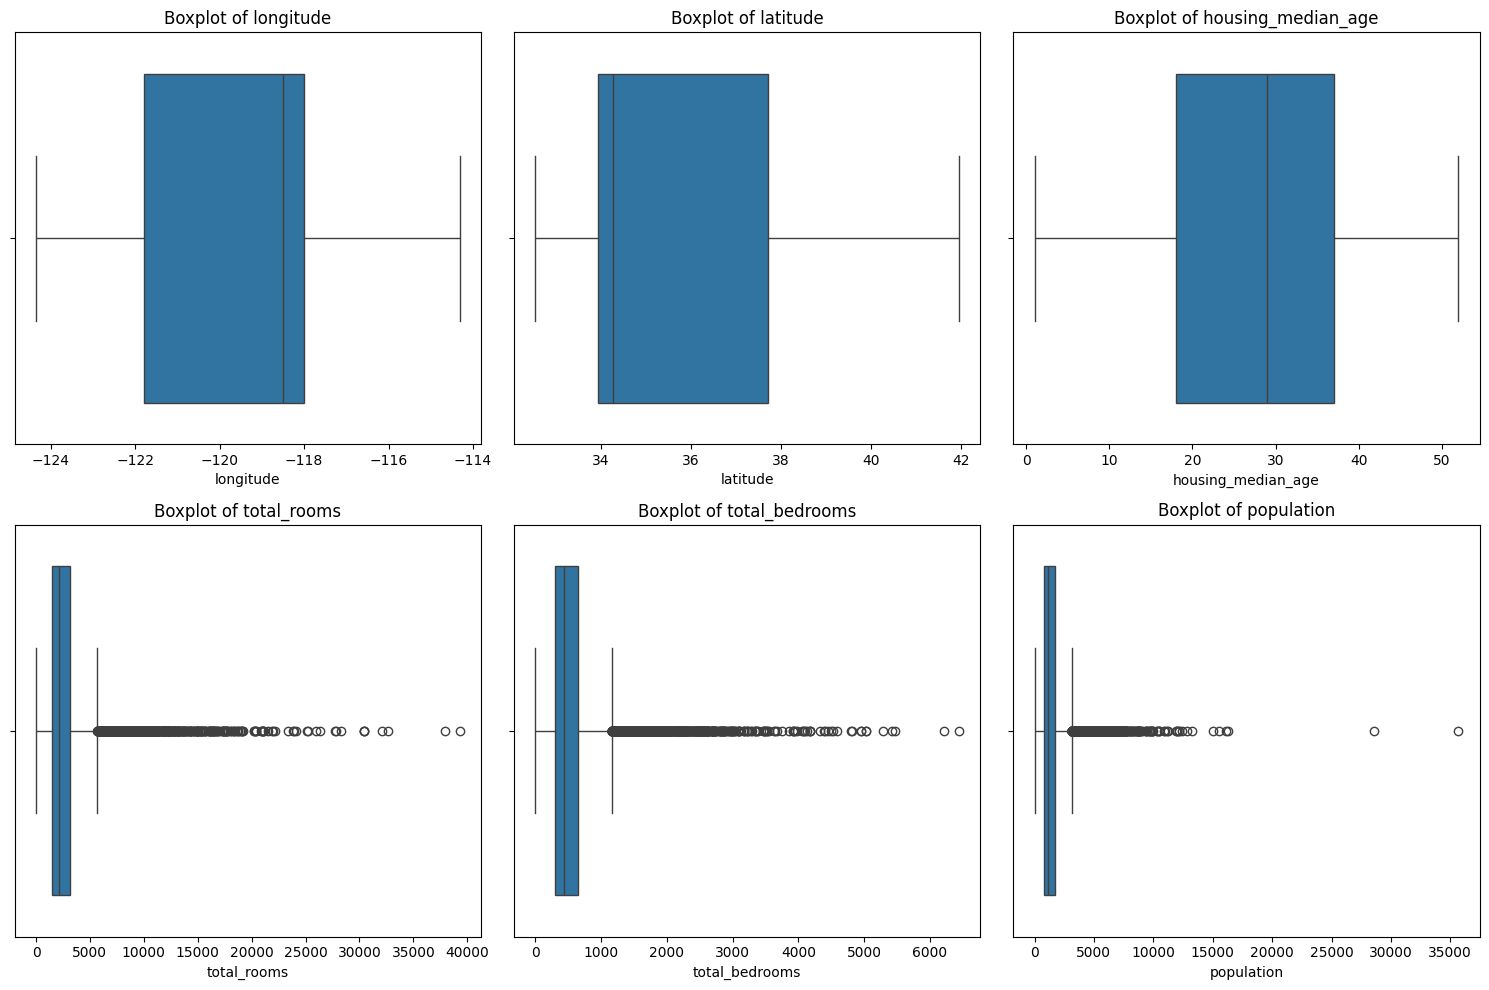

In [38]:
print("\n\n Outlier Detection Using Boxplots for Key Numerical Features \n\n")
numeric_cols = Database_After_Imputation.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6], 1):  
    plt.subplot(2, 3, i)
    sns.boxplot(x=Database_After_Imputation[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [39]:

print("\n\n I am Taking 2 Features and Seperating the Numerical and Categorical Coloumns from Each Other Here! \n\n")
X = Database_After_Imputation.drop('median_house_value', axis=1)
y = Database_After_Imputation['median_house_value']


NumCalifrna = X.select_dtypes(include=['int64', 'float64']).columns
CategCalifrna = ['ocean_proximity']




 I am Taking 2 Features and Seperating the Numerical and Categorical Coloumns from Each Other Here! 




In [40]:
NumCalifrna_Trans = StandardScaler()
CategCalifrna_trans = OneHotEncoder(handle_unknown='ignore')

CaliProcesst = ColumnTransformer(
    transformers=[
        ('num', NumCalifrna_Trans, NumCalifrna),
        ('cat', CategCalifrna_trans, CategCalifrna)
    ])




 I am Displaying the Correlation HeatMap for the Numeric Variables Here Clearly 




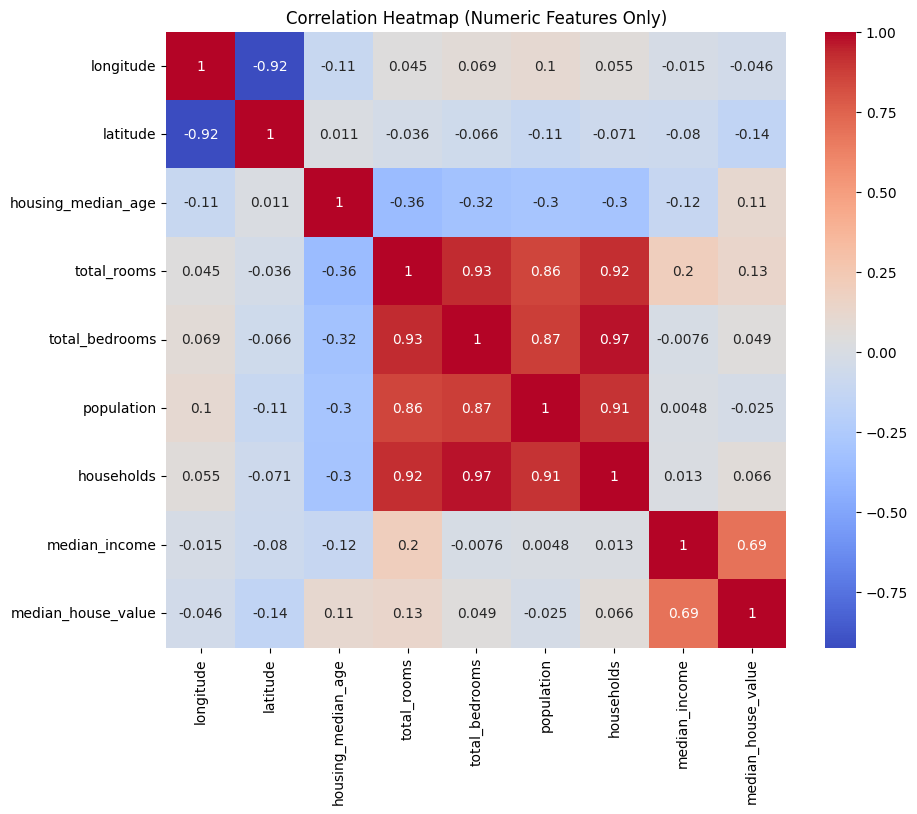

In [41]:
print("\n\n I am Displaying the Correlation HeatMap for the Numeric Variables Here Clearly \n\n")

plt.figure(figsize=(10,8))
sns.heatmap(Database_After_Imputation.select_dtypes(include=['number']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [42]:
print("\n \n I am Creating the Model and Its PipeLine Here \n\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


CaliforniaModel = Pipeline(steps=[
    ('CaliProcesst', CaliProcesst),
    ('regressor', LinearRegression())
])

CaliforniaModel.fit(X_train, y_train)


 
 I am Creating the Model and Its PipeLine Here 




Pipeline(steps=[('CaliProcesst',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('regressor', LinearRegression())])

In [43]:
print("\n\n  I am doing the Prediction and Evaluation Metrics Here Respectively Here!")
y_pred = CaliforniaModel.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation: \n ")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

CaliComs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredicted vs Actual values: \n ")
print(CaliComs.head())



  I am doing the Prediction and Evaluation Metrics Here Respectively Here!

 Model Evaluation: 
 
Root Mean Square Error (RMSE): 70060.52
R² Score: 0.6254

Predicted vs Actual values: 
 
         Actual      Predicted
20046   47700.0   54055.448899
3024    45800.0  124225.338937
15663  500001.0  255489.379492
20484  218600.0  268002.431569
9814   278000.0  262769.434816


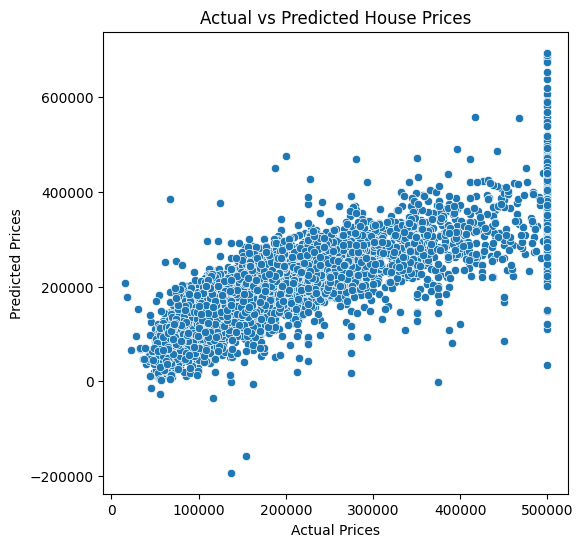

In [44]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [45]:
CaliforniaEncFts = list(NumCalifrna) + list(CaliforniaModel.named_steps['CaliProcesst']
    .transformers_[1][1].get_feature_names_out(CategCalifrna))
coefs = CaliforniaModel.named_steps['regressor'].coef_

feature_importance = pd.DataFrame({
    'Feature': CaliforniaEncFts,
    'Coefficient': coefs
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Predictors Influencing House Prices:")
print(feature_importance.head(10))


Top Predictors Influencing House Prices:
                       Feature    Coefficient
10      ocean_proximity_ISLAND  117198.489753
7                median_income   75167.774766
4               total_bedrooms   43068.181842
6                   households   18382.196324
2           housing_median_age   13889.866189
3                  total_rooms  -13094.251162
12  ocean_proximity_NEAR OCEAN  -15495.442789
8    ocean_proximity_<1H OCEAN  -18926.582862
11    ocean_proximity_NEAR BAY  -24063.225079
5                   population  -43403.432427
